# Gradient Descent - Housing

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load data to file

In [15]:
housing_df = pd.read_csv("Housing.csv")
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Understanding the data

In [16]:
print(housing_df.shape)
print(housing_df.nunique())

print(housing_df.isnull().sum())
print(housing_df.info())
housing_df.describe()

(545, 13)
price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Categorising the column
- Constinuous column
- Categorical columns

In [17]:
con_col = ["price", "area"]
cat_col = ["bedrooms", "bathrooms", "stories", 
           "mainroad", "guestroom", "basement", 
           "hotwaterheating", "airconditioning", "parking",
          "prefarea", "furnishingstatus"]

### Converting binary value columns to Numbers

In [18]:
bin_col = ["mainroad", "guestroom", "basement", 
           "hotwaterheating", "airconditioning", "prefarea"]
for col in bin_col:
    housing_df[col] = housing_df[col].map({"yes":1, "no":0})

housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


### Converting the Furnishing columns to numbers using Dummies

In [19]:
status = pd.get_dummies(housing_df["furnishingstatus"], drop_first=True)
housing_df = pd.concat([housing_df, status], axis=1)
housing_df.drop(["furnishingstatus"], axis=1, inplace=True)
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


### Normalising the data

In [21]:
housing_df = (housing_df - housing_df.mean()) / housing_df.std()
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,4.562174,1.045766,1.402131,1.420507,1.376952,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.516299,1.803284,-0.844113,-0.69579
1,4.000809,1.755397,1.402131,5.400847,2.529700,0.405251,-0.464888,-0.733865,-0.219063,1.471267,2.676950,-0.553526,-0.844113,-0.69579
2,4.000809,2.216196,0.047235,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,1.803284,1.182502,-0.69579
3,3.982096,1.082630,1.402131,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,1.471267,2.676950,1.803284,-0.844113,-0.69579
4,3.551716,1.045766,1.402131,-0.569663,0.224204,0.405251,2.147110,1.360148,-0.219063,1.471267,1.516299,-0.553526,-0.844113,-0.69579


### Visualising the data
- Target varaiable is Price
- All other columns are feature varaible

In [26]:
X_col = housing_df.columns.drop(["price"])
y_col = "price"

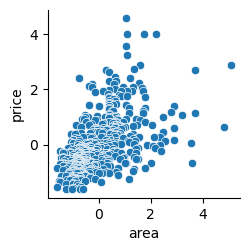

In [30]:
sns.pairplot(housing_df, x_vars=["area"], y_vars=["price"])
plt.show()

### Finding the gradient descent

In [41]:
def gradient(X, y, m_current=0, c_current=0, iters=10000, learning_rate=0.001):
    N = float(len(y))    
    gd_df = pd.DataFrame( columns = ['m_current', 'c_current','cost'])    
    for i in range(iters):        
        y_current = (m_current * X) + c_current        
        cost = sum([data**2 for data in (y-y_current)]) / N        
        m_gradient = -(2/N) * sum(X * (y - y_current))        
        c_gradient = -(2/N) * sum(y - y_current)        
        m_current = m_current - (learning_rate * m_gradient)        
        c_current = c_current - (learning_rate * c_gradient)        
        gd_df.loc[i] = [m_current,c_current,cost]    
    return(gd_df)


In [42]:
gradient_area = gradient(housing_df["area"], housing_df["price"])
gradient_area

,m_current,c_current,cost
0,0.001070,5.117211e-19,0.998165
1,0.002138,1.080481e-18,0.997021
2,0.003204,2.258744e-18,0.995882
3,0.004267,3.415820e-18,0.994747
4,0.005329,3.474489e-18,0.993617
...,...,...,...
9995,0.535997,2.804802e-16,0.711399
9996,0.535997,2.810042e-16,0.711399
9997,0.535997,2.807084e-16,0.711399
9998,0.535997,2.806644e-16,0.711399


<Axes: xlabel='index'>

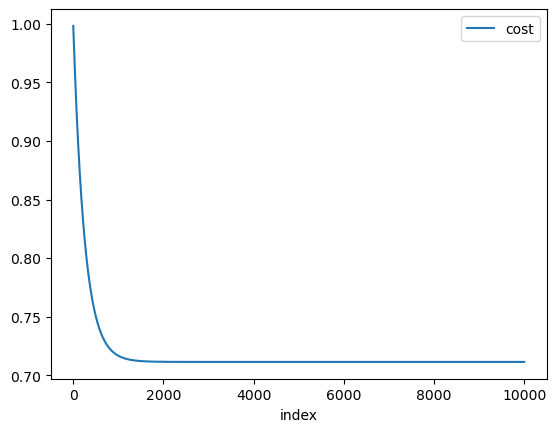

In [56]:
gradient_area.reset_index().plot.line(x="index", y=["cost"])